<a href="https://colab.research.google.com/github/afham123/Deep-Learning-Project/blob/main/Classification_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

We have used libraries such as numpy, pandas, seaborn and matplotlib.pyplot.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing datasets

In [ ]:
from google.colab import files
file = files.upload()

Saving balance-scale.data to balance-scale.data


In [ ]:
col = [ 'Class Name','Left weight','Left distance','Right weight','Right distance']
df = pd.read_csv('balance-scale.data',names=col,sep=',')
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


We can get the overall information of our data set by using df.info function.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


## EDA

We have done a little bit of exploratory data analysis. We have plotted the classes name by using countplot function. We can see in the figure given below most of the the classes names falls under R and L

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


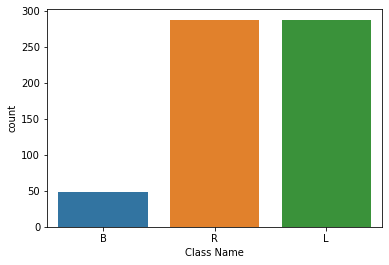

In [ ]:
sns.countplot(df['Class Name'])
plt.show()

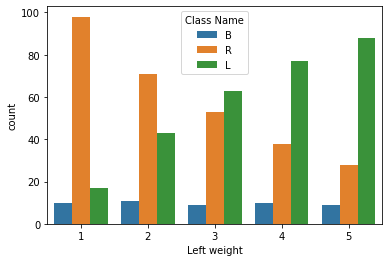

In [ ]:
sns.countplot(df['Left weight'],hue=df['Class Name'])

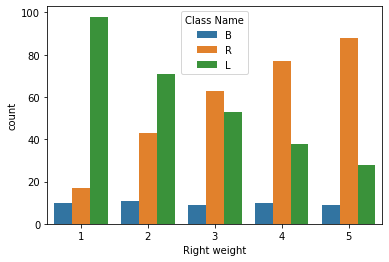

In [ ]:
sns.countplot(df['Right weight'],hue=df['Class Name'])

## Splitting the data

Before feeding the data into the model we first split it into train and test data using train_test_split function.

In [ ]:
df['Class Name'] = df['Class Name'].map({'B':1 , 'R':0, 'L':2})

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Class Name',axis=1)
y = df[['Class Name']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

## Training the model

**Using Gini Index Attribute selection**

Food training for training our model we have use Gini index as our attribute selection

After that we created the decision tree classifier by passing different parameters such as random state, max_depth and min_sample_leaf. We passed our training data to the classifier by using the model.fit method.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Making Predictions

We can make prediction on test data by using model.predict function and passing X_test as attributes.

In [ ]:
y_predict = clf_model.predict(X_test)

## calculating Aaccuracy

We can see that we are getting a pretty good accuracy of 70% on our test data.

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.7819148936170213

## Plotting Decision Tree

We can plot our decision tree with the help of graphviz library and passing after a bunch of parameters such as classfier model, target values and our features name of our data.

In [ ]:
target = list(df['Class Name'].unique())
feature_names = list(X.columns)

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

![](DecisionTREE.png)

We can also get a textual representation of the tree by using export_tree function from the Sklearn library

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- Left weight <= 2.50
|   |--- Right distance <= 1.50
|   |   |--- Left distance <= 2.50
|   |   |   |--- class: R
|   |   |--- Left distance >  2.50
|   |   |   |--- class: L
|   |--- Right distance >  1.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: R
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|--- Left weight >  2.50
|   |--- Left distance <= 2.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: L
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|   |--- Left distance >  2.50
|   |   |--- Right distance <= 3.50
|   |   |   |--- class: L
|   |   |--- Right distance >  3.50
|   |   |   |--- class: L



We can save the graph using save method.

In [ ]:
graph.save('graph1.jpg')

'graph1.jpg'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min',patience=250)

In [ ]:
model = Sequential()

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.add(Dropout(0.2))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#model.summary()

In [ ]:
model.fit(x=X_train,y=y_train,batch_size=256,epochs=1000,validation_data=(X_test,y_test),callbacks=[es])

Epoch 1/1000
2/2 [==============================] - 0s 64ms/step - loss: 1.1557 - accuracy: 0.7025 - val_loss: 0.4947 - val_accuracy: 0.8989
Epoch 2/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3255 - accuracy: 0.7346 - val_loss: 0.4965 - val_accuracy: 0.8989
Epoch 3/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.1508 - accuracy: 0.7300 - val_loss: 0.4910 - val_accuracy: 0.8989
Epoch 4/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.1583 - accuracy: 0.7368 - val_loss: 0.4952 - val_accuracy: 0.8989
Epoch 5/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1891 - accuracy: 0.7620 - val_loss: 0.5004 - val_accuracy: 0.8989
Epoch 6/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.0986 - accuracy: 0.7185 - val_loss: 0.4953 - val_accuracy: 0.9043
Epoch 7/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.2736 - accuracy: 0.7162 - val_loss: 0.4854 - val_accuracy: 0.9043
Epoch 8/1000


In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.155673,0.702517,0.494715,0.898936
1,1.325499,0.734554,0.496523,0.898936
2,1.150797,0.729977,0.490951,0.898936
3,1.158287,0.736842,0.495205,0.898936
4,1.189124,0.762014,0.500419,0.898936


In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,3.349304,0.368421,1.081495,0.430851
1,4.046952,0.389016,1.072332,0.425532
2,3.824761,0.411899,1.060851,0.446809
3,3.177629,0.411899,1.050372,0.462766
4,3.396078,0.414188,1.041004,0.446809


In [ ]:
predict = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.94      0.83      0.88        18
           2       0.99      0.99      0.99        80

    accuracy                           0.97       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.97      0.97      0.97       188



In [ ]:
print(accuracy_score(y_test,predict))

0.9787234042553191


In [ ]:
print(confusion_matrix(y_test,predict))

[[89  1  0]
 [ 2 15  1]
 [ 0  0 80]]


In [ ]:
loss_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

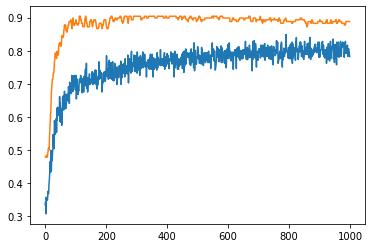

In [ ]:
plt.plot(loss_df[['accuracy','val_accuracy']])

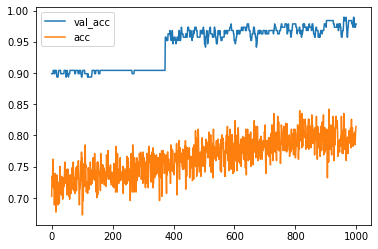

In [ ]:
plt.plot(loss_df['val_accuracy'],label='val_acc')
plt.plot(loss_df['accuracy'],label='acc')
plt.legend()
plt.show()

In [ ]:
loss_df['val_accuracy'].argmax()

343

In [ ]:
loss_df['val_accuracy'].max()

0.9042553305625916

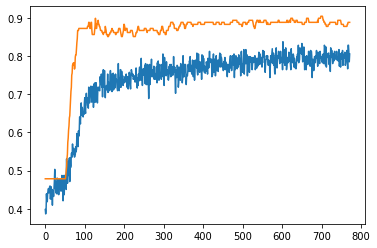

In [ ]:
plt.plot(loss_df[['accuracy','val_accuracy']])
plt.show()